In [4]:
import os
import time
import re
import numpy as np
import math
from os import listdir
from os.path import isfile, join

from PIL import Image

from tqdm import tqdm
import matplotlib.pyplot as plt

from utils import read_tiff, scan_directory_tree, make_dir, save_np_sequence_as_multitiff_stack

In [7]:
path = 'e:\\Data\\super\\'

In [9]:
radios = read_tiff(path + 'radios_corr.tif', 20)
flats = read_tiff(path + 'flats_corr.tif', 20)

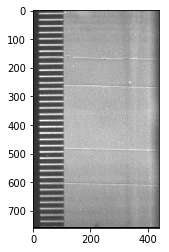

In [14]:
plt.imshow(radios[0], vmax=5000, cmap='gray')

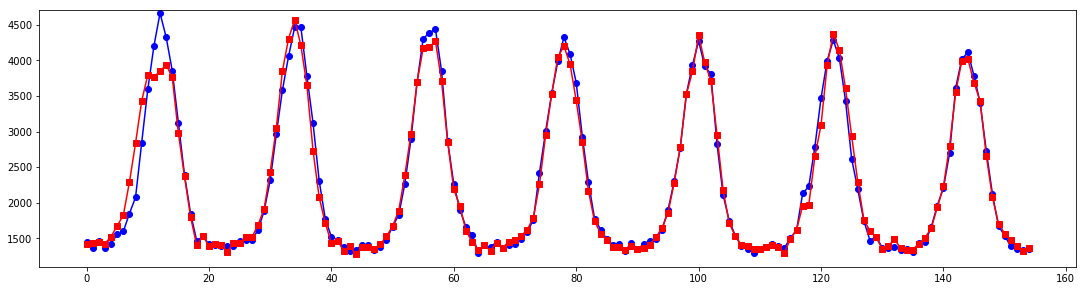

0.00304769504243324


In [114]:

#for k in range(len(flats)):
#for p in range(7):
    

k = 5  # step
p = 0  # period

period_in_px = int(10.0 / 0.4558)

x0 = 65
y0 = 460 + period_in_px*p

#h = 25
h = 615 - 460

x1 = x0
y1 = y0 + h

i = flats[k-1][y0:y1, x0:x0+1].reshape((1,h))[0]
obj = radios[k-1][y0:y1, x0:x0+1].reshape((1,h))[0]


fig = plt.figure(1)

fig.set_size_inches(18, 4, forward=True)
plt.subplots_adjust(top=0.95, bottom=0.06, left=0.1, right=0.90, hspace=0.3 )


#scale = 25.0 / 4700.0
scale = 1
plt.plot(i*scale, 'bo')
plt.plot(i*scale, 'b')
plt.plot(obj*scale, 'rs')
plt.plot(obj*scale, 'r')
plt.ylim(1100, 4700)

#circle1=plt.Circle((h/2,i[int(h/2)]*scale),0.2,color='r')
#plt.gcf().gca().add_artist(circle1)
plt.savefig(path+'\\fig\\res{}'.format(str(k+1).zfill(2)))
plt.show()
#plt.close()

L = -math.log(np.sum(obj) / np.sum(i))

print(L)

In [88]:

o1 = np.sum(obj[:int(h/2)])
o2 = np.sum(obj[int(h/2):])

print(o1, o2)

bo = (o1 - o2) / (o1 + o2) 

i1 = np.sum(i[:int(h/2)])
i2 = np.sum(i[int(h/2):])

print(i1, i2)

bi = (i1 - i2) / (i1 + i2)

R = bo - bi

print(bi)
print(bo)

print(R)



26852.258 28597.914
24764.527 30182.94
-0.098610766
-0.03148153
0.06712924


In [93]:
7*12

84